In [1]:
import sys
sys.path += ["/Users/joosep/Documents/caltech/hepaccelerate/hepaccelerate"]
import hepaccelerate

In [2]:
import json
import pandas
import matplotlib
import pickle

fig_width = 5
fig_height = 4
params = {
          #'backend': 'notebook',
          'text.latex.preamble': [r'\usepackage{gensymb}'],
          'axes.labelsize': 8, # fontsize for x and y labels (was 10)
          'axes.titlesize': 8,
          'font.size': 8, # was 10
          'text.usetex': False,
          'figure.figsize': [fig_width,fig_height],
          'font.family': 'serif',
          'image.cmap': "CMRmap",
}

matplotlib.rcParams.update(params)

import matplotlib.pyplot as plt
import itertools
import numpy as np

In [3]:
ss = """
{"use_cuda": false, "num_threads": 1, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 9.79812967213515, "sum_in_offsets": 89.94973986726404, "simple_cut": 2044.1925974664239, "max_in_offsets": 86.80438925116214, "get_in_offsets": 145.2755735543582, "mask_deltar_first": 6.856699635585661, "select_muons_opposite_sign": 85.96549566150213, "histogram_from_vector": 38.32833098822224}
{"use_cuda": false, "num_threads": 1, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 9.86839881326699, "sum_in_offsets": 93.24668513532849, "simple_cut": 2012.0273563907724, "max_in_offsets": 90.0113420852909, "get_in_offsets": 154.36151099909574, "mask_deltar_first": 6.863969119203227, "select_muons_opposite_sign": 86.07184819441592, "histogram_from_vector": 38.463933609943346}
{"use_cuda": false, "num_threads": 1, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 9.904649288555458, "sum_in_offsets": 90.50783912150105, "simple_cut": 2005.2721434220146, "max_in_offsets": 87.53371935649878, "get_in_offsets": 145.64004360405607, "mask_deltar_first": 6.854795839022776, "select_muons_opposite_sign": 85.97038254940229, "histogram_from_vector": 39.619828041139954}
{"use_cuda": false, "num_threads": 1, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 9.887569165068824, "sum_in_offsets": 89.80275074801281, "simple_cut": 2006.5512878894322, "max_in_offsets": 87.0791309937795, "get_in_offsets": 146.37776717920337, "mask_deltar_first": 6.859861284341248, "select_muons_opposite_sign": 85.96477520579306, "histogram_from_vector": 38.39157633166562}
{"use_cuda": false, "num_threads": 1, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 9.894474478835823, "sum_in_offsets": 89.91408689535685, "simple_cut": 2038.6812159623926, "max_in_offsets": 86.83039519474247, "get_in_offsets": 145.035864044155, "mask_deltar_first": 6.857625020233924, "select_muons_opposite_sign": 85.88938211324337, "histogram_from_vector": 38.33174988230126}
{"use_cuda": false, "num_threads": 2, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 14.407946424974332, "sum_in_offsets": 167.16829451516858, "simple_cut": 1763.3756711956887, "max_in_offsets": 166.25401605569982, "get_in_offsets": 264.284021738658, "mask_deltar_first": 12.953280869472069, "select_muons_opposite_sign": 153.94953164836485, "histogram_from_vector": 67.46022152548228}
{"use_cuda": false, "num_threads": 2, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 14.018266845392633, "sum_in_offsets": 167.4461703429264, "simple_cut": 1900.4218402751708, "max_in_offsets": 166.78916216226153, "get_in_offsets": 267.7638111509109, "mask_deltar_first": 12.750711426066442, "select_muons_opposite_sign": 155.36719397867193, "histogram_from_vector": 65.75373750252582}
{"use_cuda": false, "num_threads": 2, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 13.018677447655644, "sum_in_offsets": 167.4655445098522, "simple_cut": 1781.3638659115963, "max_in_offsets": 166.064784108705, "get_in_offsets": 264.24524385265363, "mask_deltar_first": 12.967584739711706, "select_muons_opposite_sign": 155.01122744258046, "histogram_from_vector": 67.72106132767804}
{"use_cuda": false, "num_threads": 2, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 14.051256155598068, "sum_in_offsets": 171.14485102362525, "simple_cut": 1814.4363169384114, "max_in_offsets": 165.7653765435794, "get_in_offsets": 257.69019285629247, "mask_deltar_first": 12.981185922516294, "select_muons_opposite_sign": 154.2191342595274, "histogram_from_vector": 67.76295964374508}
{"use_cuda": false, "num_threads": 2, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 13.389522555752297, "sum_in_offsets": 167.65274181677606, "simple_cut": 1661.1412776353127, "max_in_offsets": 167.62879818103917, "get_in_offsets": 267.023423009126, "mask_deltar_first": 12.983109026987194, "select_muons_opposite_sign": 155.37118449556448, "histogram_from_vector": 69.79385738828321}
{"use_cuda": false, "num_threads": 4, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 23.55752912171416, "sum_in_offsets": 321.20020758942184, "simple_cut": 1726.873432102886, "max_in_offsets": 316.9331295950348, "get_in_offsets": 465.66856419732864, "mask_deltar_first": 23.63977201489849, "select_muons_opposite_sign": 260.44680361701825, "histogram_from_vector": 109.25041743299784}
{"use_cuda": false, "num_threads": 4, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 23.959831748548797, "sum_in_offsets": 321.26669200483695, "simple_cut": 1917.3962360299736, "max_in_offsets": 314.9626692142764, "get_in_offsets": 462.52618307248633, "mask_deltar_first": 22.826004323080866, "select_muons_opposite_sign": 260.6545609232942, "histogram_from_vector": 113.23060470872142}
{"use_cuda": false, "num_threads": 4, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 23.68390611273374, "sum_in_offsets": 320.7102975642249, "simple_cut": 1741.3917217083217, "max_in_offsets": 316.03434106485986, "get_in_offsets": 462.20721262173777, "mask_deltar_first": 23.30125046283429, "select_muons_opposite_sign": 260.13291956044736, "histogram_from_vector": 108.8204661182291}
{"use_cuda": false, "num_threads": 4, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 23.147536203413942, "sum_in_offsets": 301.5830377292837, "simple_cut": 1893.8618753449837, "max_in_offsets": 312.5736388496053, "get_in_offsets": 454.73258599682737, "mask_deltar_first": 23.003410888853832, "select_muons_opposite_sign": 258.38249116011326, "histogram_from_vector": 112.3678125421998}
{"use_cuda": false, "num_threads": 4, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 22.83372780059341, "sum_in_offsets": 321.71925373218187, "simple_cut": 1698.1477288494762, "max_in_offsets": 315.4187163649345, "get_in_offsets": 445.13426026815193, "mask_deltar_first": 23.480461701630873, "select_muons_opposite_sign": 260.5224441659691, "histogram_from_vector": 110.75595722135816}
{"use_cuda": false, "num_threads": 8, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 35.477292148763254, "sum_in_offsets": 492.65110325071674, "simple_cut": 1740.903418589687, "max_in_offsets": 547.7143022027414, "get_in_offsets": 690.3239113441578, "mask_deltar_first": 40.30568658974676, "select_muons_opposite_sign": 390.38447279225846, "histogram_from_vector": 159.2726796717604}
{"use_cuda": false, "num_threads": 8, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 35.47293397663288, "sum_in_offsets": 540.2465540168083, "simple_cut": 1712.719553915177, "max_in_offsets": 566.8802821749608, "get_in_offsets": 731.7671563520865, "mask_deltar_first": 39.60854666474825, "select_muons_opposite_sign": 369.9706082484282, "histogram_from_vector": 160.66342893559238}
{"use_cuda": false, "num_threads": 8, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 36.28372010962002, "sum_in_offsets": 482.39140004907335, "simple_cut": 1704.9218627045152, "max_in_offsets": 544.239647124936, "get_in_offsets": 689.1905632928735, "mask_deltar_first": 40.09515751481685, "select_muons_opposite_sign": 399.149773496634, "histogram_from_vector": 162.51948149345262}
{"use_cuda": false, "num_threads": 8, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 35.52276200207095, "sum_in_offsets": 461.2664629505223, "simple_cut": 1664.6458445542041, "max_in_offsets": 450.1814074709573, "get_in_offsets": 540.6836176478273, "mask_deltar_first": 39.91362001227928, "select_muons_opposite_sign": 393.6216212574121, "histogram_from_vector": 157.25176829626113}
{"use_cuda": false, "num_threads": 8, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 35.8997443368948, "sum_in_offsets": 539.8213129266832, "simple_cut": 1750.487984875421, "max_in_offsets": 567.3355978482057, "get_in_offsets": 733.5259002677032, "mask_deltar_first": 40.30970153112449, "select_muons_opposite_sign": 395.24716770610473, "histogram_from_vector": 160.31297939322775}
{"use_cuda": false, "num_threads": 18, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 40.50303706741313, "sum_in_offsets": 578.6174406007882, "simple_cut": 1696.4747972070613, "max_in_offsets": 844.2065271833335, "get_in_offsets": 842.6506306785631, "mask_deltar_first": 63.3524298963408, "select_muons_opposite_sign": 521.7362609244486, "histogram_from_vector": 214.16457362634173}
{"use_cuda": false, "num_threads": 18, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 39.36825103565983, "sum_in_offsets": 573.8658492158976, "simple_cut": 1799.0092014854467, "max_in_offsets": 871.1073732169497, "get_in_offsets": 885.7395333788868, "mask_deltar_first": 64.46893601334193, "select_muons_opposite_sign": 525.6713881826568, "histogram_from_vector": 217.3132548532962}
{"use_cuda": false, "num_threads": 18, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 38.372225071516816, "sum_in_offsets": 566.9497591417901, "simple_cut": 1792.5709875662944, "max_in_offsets": 817.4050664144327, "get_in_offsets": 795.0992783504877, "mask_deltar_first": 64.77880656705665, "select_muons_opposite_sign": 554.7371225127737, "histogram_from_vector": 210.8989994766864}
{"use_cuda": false, "num_threads": 18, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 38.803805254462176, "sum_in_offsets": 620.6615111733151, "simple_cut": 1828.9385290178539, "max_in_offsets": 775.5024971520236, "get_in_offsets": 804.4720152819502, "mask_deltar_first": 64.99684071235266, "select_muons_opposite_sign": 545.9853452293452, "histogram_from_vector": 218.45359225153618}
{"use_cuda": false, "num_threads": 18, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 39.38401080982362, "sum_in_offsets": 620.6419176782252, "simple_cut": 1735.6650187500459, "max_in_offsets": 805.3700412843849, "get_in_offsets": 796.5220322011695, "mask_deltar_first": 65.66676594428296, "select_muons_opposite_sign": 554.7110358346872, "histogram_from_vector": 213.91504129103276}
{"use_cuda": false, "num_threads": 24, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 35.32508907605202, "sum_in_offsets": 681.22438820275, "simple_cut": 1684.6393772839576, "max_in_offsets": 727.385668352963, "get_in_offsets": 816.7004800553882, "mask_deltar_first": 75.76308701267632, "select_muons_opposite_sign": 590.2625496290849, "histogram_from_vector": 231.75243193763362}
{"use_cuda": false, "num_threads": 24, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 33.60018920360151, "sum_in_offsets": 868.1582483536217, "simple_cut": 1502.1123760726862, "max_in_offsets": 866.9395791482012, "get_in_offsets": 807.9046202201943, "mask_deltar_first": 70.07013767899171, "select_muons_opposite_sign": 525.9198184374902, "histogram_from_vector": 221.97345360984013}
{"use_cuda": false, "num_threads": 24, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 35.43863944043305, "sum_in_offsets": 608.5030091708666, "simple_cut": 1714.1381922343642, "max_in_offsets": 743.9674677750063, "get_in_offsets": 824.4376995782065, "mask_deltar_first": 65.5328797833573, "select_muons_opposite_sign": 484.25489380477933, "histogram_from_vector": 228.81088467583703}
{"use_cuda": false, "num_threads": 24, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 33.905353937547936, "sum_in_offsets": 573.4501711782793, "simple_cut": 1744.9723940355027, "max_in_offsets": 723.2647052423756, "get_in_offsets": 650.1939326149386, "mask_deltar_first": 72.95544925551015, "select_muons_opposite_sign": 577.0182719153944, "histogram_from_vector": 198.56953643896682}
{"use_cuda": false, "num_threads": 24, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 34.62980159864675, "sum_in_offsets": 492.16087349193504, "simple_cut": 1612.06083946784, "max_in_offsets": 769.2667573369157, "get_in_offsets": 804.1676358807248, "mask_deltar_first": 74.98852309254201, "select_muons_opposite_sign": 529.0190279658622, "histogram_from_vector": 225.1572984911271}
{"use_cuda": true, "num_threads": 1, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 1164.6242702525522, "sum_in_offsets": 1913.1203943787148, "simple_cut": 365767.8568582946, "max_in_offsets": 1692.7621989926095, "get_in_offsets": 3301.3387209090147, "mask_deltar_first": 94.61118211853895, "select_muons_opposite_sign": 3043.0723189804844, "histogram_from_vector": 1422.6462183028607}
{"use_cuda": true, "num_threads": 1, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 18512.262058505963, "sum_in_offsets": 1993.0579928664959, "simple_cut": 376268.36949537473, "max_in_offsets": 1697.3535909981078, "get_in_offsets": 3112.404586722955, "mask_deltar_first": 94.70004968359092, "select_muons_opposite_sign": 3067.9636359021038, "histogram_from_vector": 1421.865972008703}
{"use_cuda": true, "num_threads": 1, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 19008.965246442673, "sum_in_offsets": 2001.172843334945, "simple_cut": 372701.8446660348, "max_in_offsets": 1694.4156432595487, "get_in_offsets": 3296.2187930308914, "mask_deltar_first": 94.40964731425828, "select_muons_opposite_sign": 3025.549754714271, "histogram_from_vector": 1495.125054176041}
{"use_cuda": true, "num_threads": 1, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 18758.071692263657, "sum_in_offsets": 1992.6708082639323, "simple_cut": 372113.98686687695, "max_in_offsets": 1693.8925140087738, "get_in_offsets": 3290.885180063887, "mask_deltar_first": 94.82097203186417, "select_muons_opposite_sign": 3047.081274441072, "histogram_from_vector": 1434.061148570317}
{"use_cuda": true, "num_threads": 1, "use_avx": true, "num_events": 11249555, "memsize": 3217159078, "memory_transfer": 19394.957881749426, "sum_in_offsets": 1993.5127059555196, "simple_cut": 379293.0348450161, "max_in_offsets": 1696.8042382197673, "get_in_offsets": 3319.4077592559765, "mask_deltar_first": 94.78291501872796, "select_muons_opposite_sign": 3065.4920435758836, "histogram_from_vector": 1384.7198966602884}
"""

In [4]:
dd = []
for line in ss.split("\n"):
    if len(line) > 0:
        dd += [json.loads(line)]

In [5]:
df = pandas.DataFrame.from_dict(dd)
df = df.drop(columns=["use_avx", "simple_cut"]);

In [6]:
df = df[df["num_threads"]<24]

In [7]:
ms = df.groupby(["use_cuda", "num_threads"]).mean()

In [8]:
ms

get_in_offsets  histogram_from_vector  \
use_cuda num_threads                                          
False    1                147.338152              38.627084   
         2                264.201339              67.698367   
         4                458.053761             110.885052   
         8                677.098230             160.004068   
         18               824.896698             214.949092   
True     1               3264.051008            1431.683658   

                      mask_deltar_first  max_in_offsets  memory_transfer  \
use_cuda num_threads                                                       
False    1                     6.858590       87.651795         9.870644   
         2                    12.927174      166.500427        13.777134   
         4                    23.250180      315.184499        23.436506   
         8                    40.046542      535.270247        35.731291   
         18                   64.652756      822.718301        39.286266   
True     1                    94.664953     1695.045637     15367.776230   

                         memsize  num_events  select_muons_opposite_sign  \
use_cuda num_threads                                                       
False    1            3217159078    11249555                   85.972377   
         2            3217159078    11249555                  154.783654   
         4            3217159078    11249555                  260.027844   
         8            3217159078    11249555                  389.674729   
         18           3217159078    11249555                  540.568231   
True     1            3217159078    11249555                 3049.831806   

                      sum_in_offsets  
use_cuda num_threads                  
False    1                 90.684220  
         2                168.175520  
         4                317.295898  
         8                503.275367  
         18               592.147296  
True     1               1978.706949

In [9]:
es = df.groupby(["use_cuda", "num_threads"]).std()

In [10]:
sorted(ms.columns)

['get_in_offsets',
 'histogram_from_vector',
 'mask_deltar_first',
 'max_in_offsets',
 'memory_transfer',
 'memsize',
 'num_events',
 'select_muons_opposite_sign',
 'sum_in_offsets']

ncores [1, 2, 4, 8, 18]
0 0 get_in_offsets
1 1 histogram_from_vector
2 2 mask_deltar_first
3 3 max_in_offsets
4 3 memory_transfer
5 3 memsize
6 3 num_events
7 3 select_muons_opposite_sign
8 4 sum_in_offsets


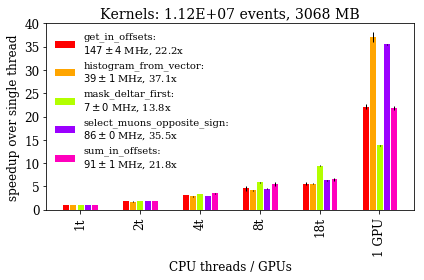

In [11]:
plt.figure(figsize=(6,4))
plt.set_cmap('CMRmap')

marker = itertools.cycle(('o', '.', '^', 's', 'd', 'D')) 
xs = np.arange(len(ms.index.levels[1])+1)
n = -0.23

i = 0
ncores = list(ms.index.levels[1])

print("ncores", ncores)
for icol, col in enumerate(sorted(ms.columns)):
    print(icol, i, col)
    if col in ["memory_transfer", "memsize", "num_events", "max_in_offsets"]:
        continue
    norm = ms[col].values[0]
    ratio = ms[col].values[-1] / ms[col].values[0]

    m = next(marker)
    color = plt.cm.hsv(icol / len(ms.columns))
    plt.bar(xs + n, ms[col].values/norm, width=0.1, label=col + ":\n${0:.0f} \pm {1:.0f}$ MHz, {2:.1f}x".format(ms[col].values[0], es[col].values[0], ratio), color=color)
    plt.errorbar(xs + n, ms[col].values/norm, es[col].values/norm, lw=0, elinewidth=1, ms=0, color="black")
    #plt.plot([i-0.25, i+0.25], [ncores[i], ncores[i]], color="gray", lw=1, ls="--")
    n += 0.12
    
    i += 1
    
plt.legend(frameon=False, fontsize=10, ncol=1, loc=2)
#plt.yscale("log")
plt.ylim(0,40)
#plt.axhline(1, color="black", lw=1)
plt.xticks(xs, ["{0}t".format(x)for x in ms.index.levels[1]] + ["1 GPU"], fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("CPU threads / GPUs", fontsize=12)
plt.ylabel("speedup over single thread", fontsize=12)
plt.title("Kernels: {0:.2E} events, {1:.0f} MB".format(df["num_events"][0], df["memsize"][0]/1024/1024), fontsize=14)
plt.tight_layout()
plt.savefig("/Users/joosep/Dropbox/caltech/hepaccelerate/kernel_benchmarks.pdf", bbox_inches="tight")
plt.savefig("/Users/joosep/Dropbox/caltech/hepaccelerate/kernel_benchmarks.png", bbox_inches="tight")

In [12]:
df.groupby(["use_cuda", "num_threads"])["memory_transfer"].mean()

use_cuda  num_threads
False     1                  9.870644
          2                 13.777134
          4                 23.436506
          8                 35.731291
          18                39.286266
True      1              15367.776230
Name: memory_transfer, dtype: float64

# Full analysis benchmarks

In [3]:
ls = [
'../data/cuda1_nt1.pkl',
'../data/cuda0_nt4.pkl',
'../data/cuda0_nt1.pkl',
'../data/cuda1_nt1_njec20.pkl',
'../data/cuda0_nt4_njec20.pkl',
'../data/cuda0_nt1_njec20.pkl'
]

ds = []
for l in ls:
    with open(l, "rb") as fi:
        d = pickle.load(fi)
        ds += [d["timing"]]

df = pandas.DataFrame(ds)

df

sdf = df[df["njec"]==0]

sdf = df[df["njec"]==0]
vals1 = (sdf["num_events"] / sdf["run_analysis"]).values / 1000.0
vals1 = vals1[::-1]

sdf = df[df["njec"]==20]
vals2 = (sdf["num_events"] / sdf["run_analysis"]).values / 1000.0
vals2 = vals2[::-1]

In [44]:
vals1

array([ 50.17140634, 118.68709357, 440.59998179])

In [45]:
vals2

array([ 1.37986558,  4.03477963, 20.16227613])

In [42]:
1e9/(vals1*1000) / 3600

array([5.53657547, 2.3404211 , 0.63045345])

In [43]:
1e9/(vals2*1000) / 3600

array([201.30785312,  68.84583621,  13.77710413])

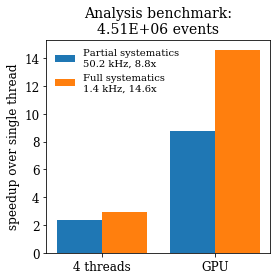

In [46]:
plt.figure(figsize=(4,4))
plt.set_cmap('CMRmap')

xs = np.arange(len(vals1))
n = 0.4

i = 0

plt.bar(xs[1:], vals1[1:]/vals1[0], width=n, label="Partial systematics\n{0:.1f} kHz, {1:.1f}x".format(vals1[0], vals1[2]/vals1[0]))
plt.bar(xs[1:] + n, vals2[1:]/vals2[0], width=n, label="Full systematics\n{0:.1f} kHz, {1:.1f}x".format(vals2[0], vals2[2]/vals2[0]))
plt.xticks(xs[1:]+n/2, ["4 threads", "GPU"], fontsize=12)
plt.legend(loc="best", frameon=False, fontsize=10)
plt.yticks(fontsize=12)
#plt.xlabel("CPU threads / GPUs", fontsize=12)
plt.ylabel("speedup over single thread", fontsize=12)

plt.title("Analysis benchmark:\n{0:.2E} events".format(df["num_events"][0]), fontsize=14)
plt.tight_layout()
plt.savefig("/Users/joosep/Dropbox/caltech/hepaccelerate/analysis_benchmark.pdf", bbox_inches="tight")
plt.savefig("/Users/joosep/Dropbox/caltech/hepaccelerate/analysis_benchmark.png", bbox_inches="tight")

In [20]:
d = pickle.load(open("../data/cuda0_nt2_nj12_njec2_full.pkl", "rb"))
d["timing"]["num_events"] / d["timing"]["walltime"]

321097.9966026489

In [21]:
d = pickle.load(open("../data/cuda1_nt1_nj2_njec2_full.pkl", "rb"))
d["timing"]["num_events"] / d["timing"]["walltime"]

529686.2401179208